In [1]:
""" Prepare and load the data for input - 
    1. folders = ["path_to_wt_dir", path_to_oe1_dir", "path_to_oe2_dir", ...]
    2. column_names = ['Area_Percentage', 'Compound_Name'] // these two columns are necessary 
"""

' Prepare and load the data for input - \n    1. folders = ["path_to_wt_dir", path_to_oe1_dir", "path_to_oe2_dir", ...]\n    2. column_names = [\'Area_Percentage\', \'Compound_Name\'] // these two columns are necessary \n'

In [3]:
# prepare dataframe for further analysis

from mbSTATS.data_preparation import load_csv_data
from mbSTATS.final_df_prep import create_summary_dataframe 
folders = ["/home/satvik/Thesis/csv/wt", "/home/satvik/Thesis/csv/oe"]
column_names = [
    "Start_Time", "End_Time", "Retention_Time", "Ion_Mode", 
    "Intensity", "Area_Percentage", "Adjusted_Intensity", 
    "Adjusted_Area_Percentage", "Peak_Width", "Flag", 
    "Compound_Name", "CAS_Number", "Similarity_Score"
]
dataframes = load_csv_data(folders, column_names)
print("Dataframes loaded:", list(dataframes.keys()))  #
summary_df, compound_to_code = create_summary_dataframe(dataframes)
    
print("Summary DataFrame:")
print(summary_df)

print("Compounds to code:")
print(compound_to_code)


Dataframes loaded: ['wt_wt1_1', 'wt_wt1_3', 'wt_wt1_2', 'oe_oe1_2', 'oe_oe1_3', 'oe_oe1_1']
Summary DataFrame:
     sample    c1    c2     c3    c4    c5    c6    c7    c8    c9   c10  \
0  wt_wt1_1  0.89  1.53   0.60  1.95  0.48  1.07  0.35  0.82  4.05  0.46   
1  wt_wt1_3  1.22  1.88  28.26  5.79  0.65  1.22  0.45  1.04  5.23  0.57   
2  wt_wt1_2  1.10  1.65  27.09  2.27  7.33  1.19  0.42  0.90  4.75  0.55   
3  oe_oe1_2  2.01  7.36  17.99  1.46  5.31  0.49  0.72  4.47  5.21  0.59   
4  oe_oe1_3  2.01  7.60   0.74  1.43  5.28  0.48  0.64  4.81  5.29  0.58   
5  oe_oe1_1  1.90  7.44  17.20  1.42  5.32  0.51  0.61  4.48  5.00  0.48   

    c11   c12   c13   c14    c15  
0  0.83  3.35  1.61  1.78   0.48  
1  0.95  4.74  1.97  2.39   9.70  
2  0.86  4.40  1.83  2.12  10.40  
3  1.75  1.23  2.58  3.09  10.47  
4  1.91  1.19  2.52  3.14   9.96  
5  1.84  1.22  2.53  3.15   9.92  
Compounds to code:
{'1,3-Propanediol, 2TMS derivative': 'c1', '1-Monopalmitin, 2TMS derivative': 'c2', 'D-(+)-T

In [4]:
# need to add code for code_to_compound 
code_to_compound = {value: key for key, value in compound_to_code.items()}

In [5]:
code_to_compound

{'c1': '1,3-Propanediol, 2TMS derivative',
 'c2': '1-Monopalmitin, 2TMS derivative',
 'c3': 'D-(+)-Talose, pentakis(trimethylsilyl) ether, methyloxime (syn)',
 'c4': 'D-Allose, oxime (isomer 1), 6TMS derivative',
 'c5': 'D-Fructose, 1,3,4,5,6-pentakis-O-(trimethylsilyl)-, O-methyloxime',
 'c6': 'D-Trehalose 8TMS',
 'c7': 'Dodecane, 4,6-dimethyl-',
 'c8': 'Glycerol monostearate, 2TMS derivative',
 'c9': 'Glycerol, 3TMS derivative',
 'c10': 'L-Threitol, 4TMS derivative',
 'c11': 'Lactic Acid, 2TMS derivative',
 'c12': 'Myo-Inositol, 6TMS',
 'c13': 'Pentasiloxane, dodecamethyl-',
 'c14': 'Sucrose, 8TMS derivative',
 'c15': 'Xylitol, 5TMS'}

In [7]:
output = "/home/satvik/mbSTATS/output_plots"

In [6]:
# now use different types of normalization techniques on the original dataframe 
# applying tsn normalization 

from mbSTATS.normalization_methods.pqn_normalization import pqn_normalization

pqn_normalized_df = pqn_normalization(summary_df)
print(pqn_normalized_df)

     sample        c1         c2         c3        c4         c5        c6  \
0  wt_wt1_1  0.920345   1.582166   0.620457  2.016486   0.496366  1.106482   
1  wt_wt1_3  2.050937   3.160461  47.507780  9.733547   1.092713  2.050937   
2  wt_wt1_2  1.962252   2.943378  48.324918  4.049375  13.075734  2.122800   
3  oe_oe1_2  3.518736  12.884526  31.493562  2.555898   9.295765  0.857801   
4  oe_oe1_3  2.782639  10.521422   1.024454  1.979689   7.309619  0.664511   
5  oe_oe1_1  3.324196  13.016850  30.092718  2.484399   9.307748  0.892284   

         c7        c8        c9       c10       c11       c12       c13  \
0  0.361933  0.847958  4.188086  0.475684  0.858299  3.464219  1.664893   
1  0.756493  1.748340  8.792133  0.958225  1.597041  7.968396  3.311760   
2  0.749224  1.605479  8.473361  0.981126  1.534124  7.849008  3.264474   
3  1.260443  7.825249  9.120704  1.032863  3.063576  2.153256  4.516586   
4  0.886014  6.658952  7.323463  0.802951  2.644199  1.647433  3.488682   
5  

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import os 

def generate_color_palette(n_colors):
    """
    Generate a color palette of length `n_colors` based on a predefined gradient.

    Parameters:
    n_colors (int): The number of colors needed in the palette.

    Returns:
    list: A list of hex color codes.
    """
    # Predefined base colors for the palette (stronger, more visible colors)
    base_colors = ["#E0BBE4", "#D39CD7", "#C57EC3", "#9B59B6", "#8E44AD", "#6C3483", "#4B0082", "#3A0063"]
    # Create a linear color map from the base colors
    cmap = LinearSegmentedColormap.from_list("custom_palette", base_colors, N=256)

    # Generate evenly spaced colors along the colormap
    palette = [cmap(i / (n_colors - 1)) for i in range(n_colors)]

    # Convert RGBA to HEX
    hex_palette = ["#%02x%02x%02x" % (int(r * 255), int(g * 255), int(b * 255)) for r, g, b, _ in palette]

    return hex_palette

def plot_p_values(p_values_df, code_to_compound, th):
    """
    Plot p-values with a color palette and pastel colors, using compound names instead of codes.

    Parameters:
    p_values_df (DataFrame): A DataFrame containing compounds and their corresponding p-values.
    code_to_compound (dict): A dictionary mapping compound codes to their respective names.
    """
    # Map compound codes to names
    p_values_df['Compound Name'] = p_values_df['Compound'].map(code_to_compound)

    # Check for any unmapped compound names
    if p_values_df['Compound Name'].isnull().any():
        print("Warning: Some compound codes could not be mapped to names.")
        print(p_values_df[p_values_df['Compound Name'].isnull()])

    # Extract compound names and p-values for plotting
    compounds = p_values_df['Compound Name'].fillna(p_values_df['Compound'])  # Use original code if name is not mapped
    p_values = p_values_df['p-value']

    # Generate a pastel color palette
    colors = generate_color_palette(len(compounds))

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.bar(compounds, p_values, color=colors)

    # Add a threshold line for p-value significance (e.g., 0.05)
    plt.axhline(y=th, color='red', linestyle='--', label='Significance Threshold (p = 0.05)')

    # Labels and title
    plt.xlabel('Compound Names', fontsize=14)
    plt.ylabel('p-value', fontsize=14)
    plt.title('P-Values for Each Compound', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=7)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)

    # Adjust layout for better fit
    plt.tight_layout()

    # Save plot
    output_file = os.path.join(output, "p_value.png")
    plt.savefig(output_file, dpi=300, bbox_inches="tight")
    print(f"Plot saved to {output_file}")

    # Display plot
    # plt.show()
    plt.close()

In [124]:
import importlib
import mbSTATS.plots_compounds.comp_density
importlib.reload(mbSTATS.plots_compounds.comp_density)

<module 'mbSTATS.plots_compounds.comp_density' from '/home/satvik/mbSTATS/mbSTATS/plots_compounds/comp_density.py'>

In [ ]:
from mbSTATS.pval_calculation import calculate_p_values
from mbSTATS.pval_plot import plot_p_values 

p_values_df = calculate_p_values(pqn_normalized_df)
print(p_values_df)
plot_p_values(p_values_df, code_to_compound, th=0.1)


   Compound   p-value
0        c1  0.029547
1        c2  0.001353
2        c3  0.583274
3        c4  0.332474
4        c5  0.457587
5        c6  0.094062
6        c7  0.059009
7        c8  0.000407
8        c9  0.497898
9       c10  0.664772
10      c11  0.006402
11      c12  0.093565
12      c13  0.106422
13      c14  0.094385
14      c15  0.497541
Plot saved to /home/satvik/mbSTATS/output_plots/p_value.png


Plot saved to /home/satvik/mbSTATS/output_plots/pca_samples.png


,PC1,PC2,sample
0,-5.496692,-2.263770,wt_wt1_1
1,-1.250416,3.190856,wt_wt1_3
2,-0.667370,2.729005,wt_wt1_2
3,3.576776,-0.527065,oe_oe1_2
4,0.859118,-2.157695,oe_oe1_3
5,2.978584,-0.971330,oe_oe1_1


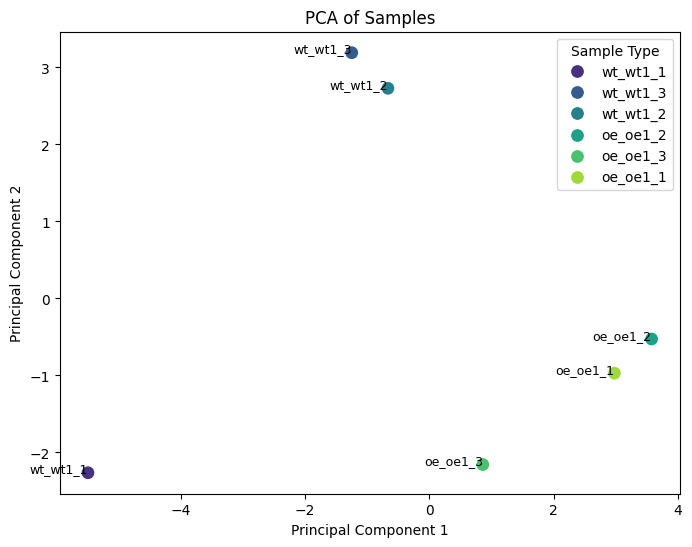

In [19]:
from mbSTATS.plots_samples.pca_analysis import perform_pca
perform_pca(pqn_normalized_df, output)

Plot saved to /home/satvik/mbSTATS/output_plots/hca_samples.png


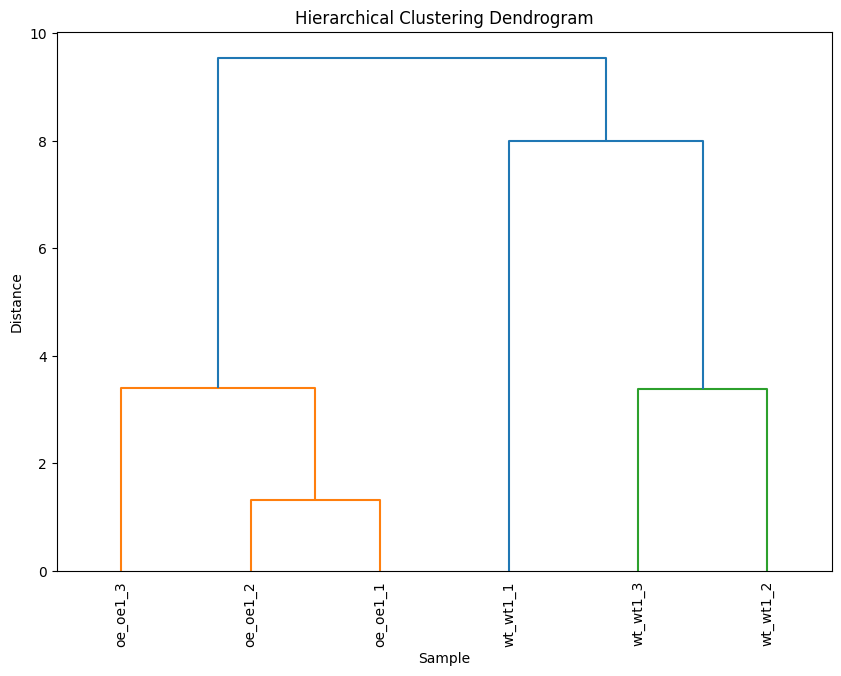

In [30]:
from mbSTATS.plots_samples.hca_analysis import perform_hca
perform_hca(pqn_normalized_df, output)

Plot saved to /home/satvik/mbSTATS/output_plots/correlation_compounds.png


,"1,3-Propanediol, 2TMS derivative","1-Monopalmitin, 2TMS derivative","D-(+)-Talose, pentakis(trimethylsilyl) ether, methyloxime (syn)","D-Allose, oxime (isomer 1), 6TMS derivative","D-Fructose, 1,3,4,5,6-pentakis-O-(trimethylsilyl)-, O-methyloxime",D-Trehalose 8TMS,"Dodecane, 4,6-dimethyl-","Glycerol monostearate, 2TMS derivative","Glycerol, 3TMS derivative","L-Threitol, 4TMS derivative","Lactic Acid, 2TMS derivative","Myo-Inositol, 6TMS","Pentasiloxane, dodecamethyl-","Sucrose, 8TMS derivative","Xylitol, 5TMS"
"1,3-Propanediol, 2TMS derivative",1.000000,0.942453,0.197829,-0.194562,0.570923,-0.464837,0.981691,0.935583,0.757662,0.644913,0.980786,-0.489591,0.969946,0.975598,0.743702
"1-Monopalmitin, 2TMS derivative",0.942453,1.000000,-0.118724,-0.445817,0.466578,-0.727203,0.882643,0.999183,0.499413,0.357135,0.983598,-0.748882,0.841905,0.860287,0.489979
"D-(+)-Talose, pentakis(trimethylsilyl) ether, methyloxime (syn)",0.197829,-0.118724,1.000000,0.661392,0.354671,0.752156,0.316143,-0.147984,0.760958,0.783041,0.041016,0.720004,0.427637,0.385993,0.728497
"D-Allose, oxime (isomer 1), 6TMS derivative",-0.194562,-0.445817,0.661392,1.000000,-0.379144,0.755909,-0.123667,-0.457354,0.374697,0.399765,-0.318593,0.783493,-0.023527,-0.023572,0.284605
"D-Fructose, 1,3,4,5,6-pentakis-O-(trimethylsilyl)-, O-methyloxime",0.570923,0.466578,0.354671,-0.379144,1.000000,-0.022336,0.594285,0.458464,0.575787,0.588569,0.529965,-0.075938,0.621317,0.588542,0.694826
D-Trehalose 8TMS,-0.464837,-0.727203,0.752156,0.755909,-0.022336,1.000000,-0.357745,-0.742956,0.223055,0.331915,-0.597261,0.996838,-0.244190,-0.278668,0.224709
"Dodecane, 4,6-dimethyl-",0.981691,0.882643,0.316143,-0.123667,0.594285,-0.357745,1.000000,0.872121,0.813393,0.739780,0.929791,-0.385650,0.977495,0.968483,0.791923
"Glycerol monostearate, 2TMS derivative",0.935583,0.999183,-0.147984,-0.457354,0.458464,-0.742956,0.872121,1.000000,0.481605,0.342625,0.979638,-0.762264,0.828091,0.848127,0.475603
"Glycerol, 3TMS derivative",0.757662,0.499413,0.760958,0.374697,0.575787,0.223055,0.813393,0.481605,1.000000,0.955896,0.638306,0.197977,0.883772,0.867788,0.982048
"L-Threitol, 4TMS derivative",0.644913,0.357135,0.783041,0.399765,0.588569,0.331915,0.739780,0.342625,0.955896,1.000000,0.491588,0.312861,0.777194,0.744759,0.954783


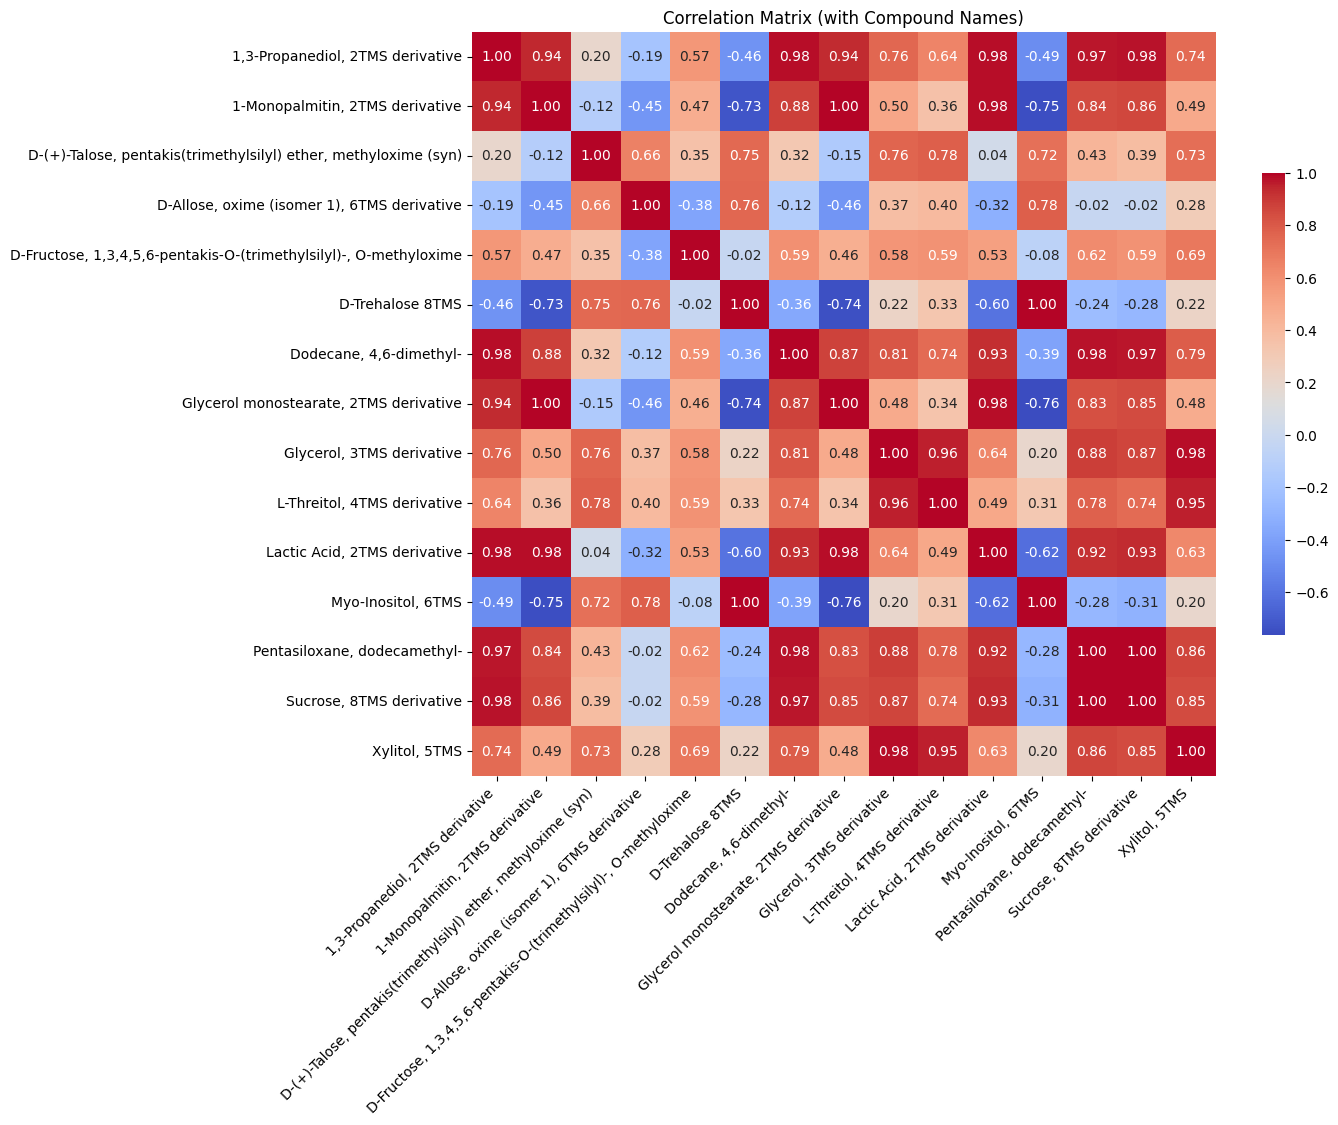

In [91]:
from mbSTATS.plots_samples.correlation_analysis import plot_correlation_matrix_compounds
plot_correlation_matrix_compounds(pqn_normalized_df, code_to_compound, output)

In [32]:
from mbSTATS.df_convert import convert
converted_df = convert(pqn_normalized_df)
print(converted_df)

sample Compounds   oe_oe1_1   oe_oe1_2   oe_oe1_3  wt_wt1_1   wt_wt1_2  \
0             c1   3.324196   3.518736   2.782639  0.920345   1.962252   
1            c10   0.839797   1.032863   0.802951  0.475684   0.981126   
2            c11   3.219221   3.063576   2.644199  0.858299   1.534124   
3            c12   2.134483   2.153256   1.647433  3.464219   7.849008   
4            c13   4.426429   4.516586   3.488682  1.664893   3.264474   
5            c14   5.511166   5.409400   4.347008  1.840690   3.781795   
6            c15  17.355800  18.328938  13.788600  0.496366  18.552202   
7             c2  13.016850  12.884526  10.521422  1.582166   2.943378   
8             c3  30.092718  31.493562   1.024454  0.620457  48.324918   
9             c4   2.484399   2.555898   1.979689  2.016486   4.049375   
10            c5   9.307748   9.295765   7.309619  0.496366  13.075734   
11            c6   0.892284   0.857801   0.664511  1.106482   2.122800   
12            c7   1.067242   1.260443

Plot saved to /home/satvik/mbSTATS/output_plots/hca_compounds.png


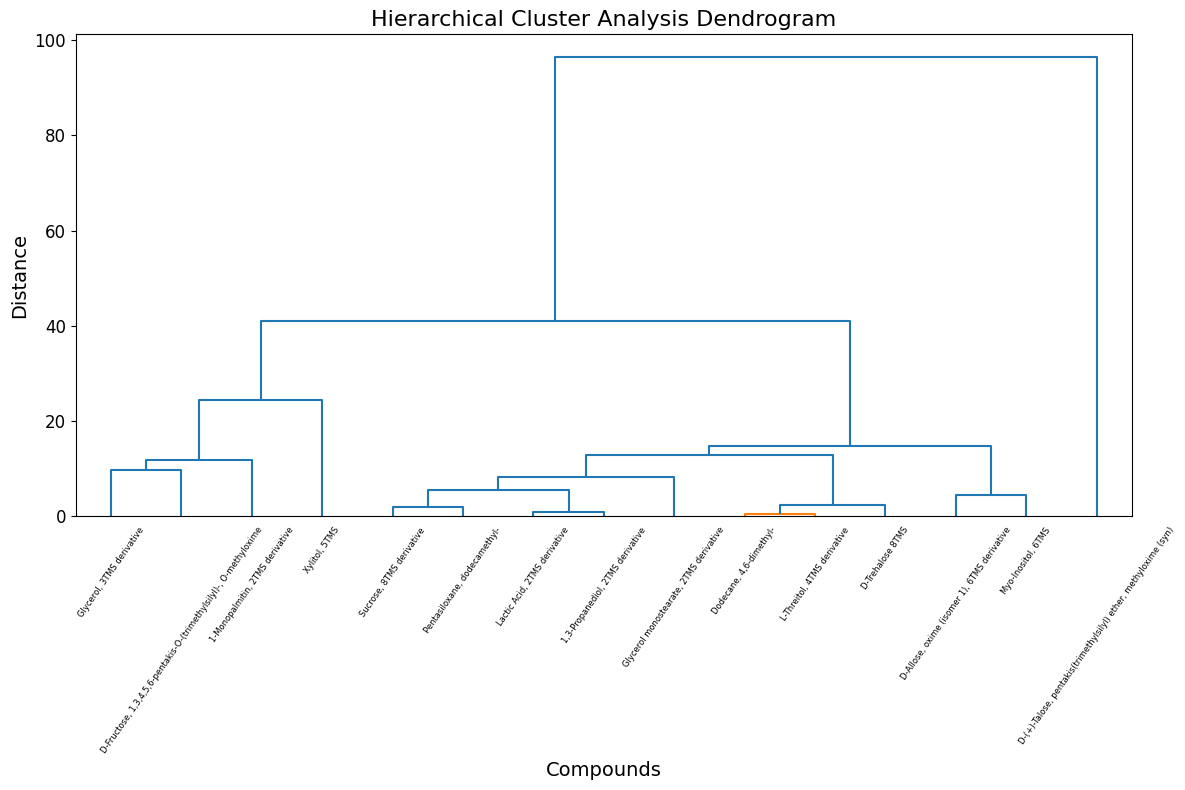

In [66]:
from mbSTATS.plots_compounds.hca_analysis import plot_hca
plot_hca(converted_df, output, code_to_compound)

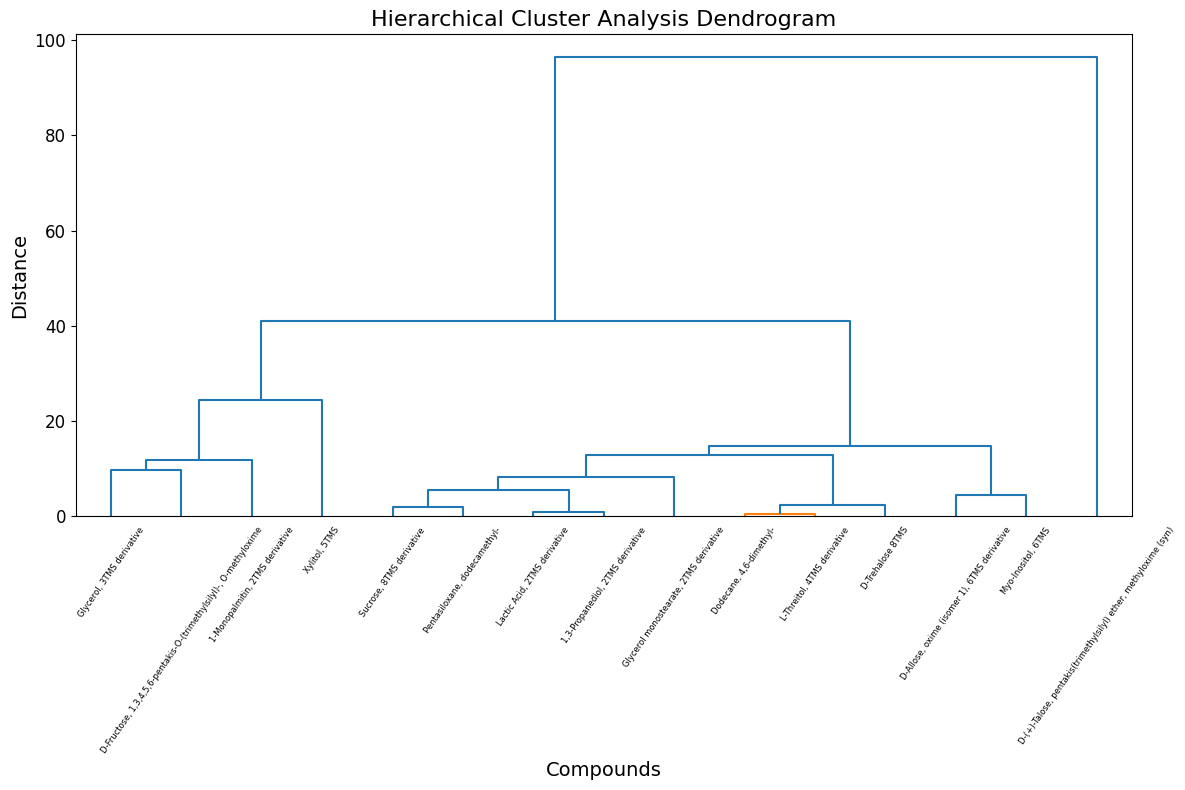

In [ ]:
# hierarchical_clustering(converted_df)

Plot saved to /home/satvik/mbSTATS/output_plots/pca_compounds.png


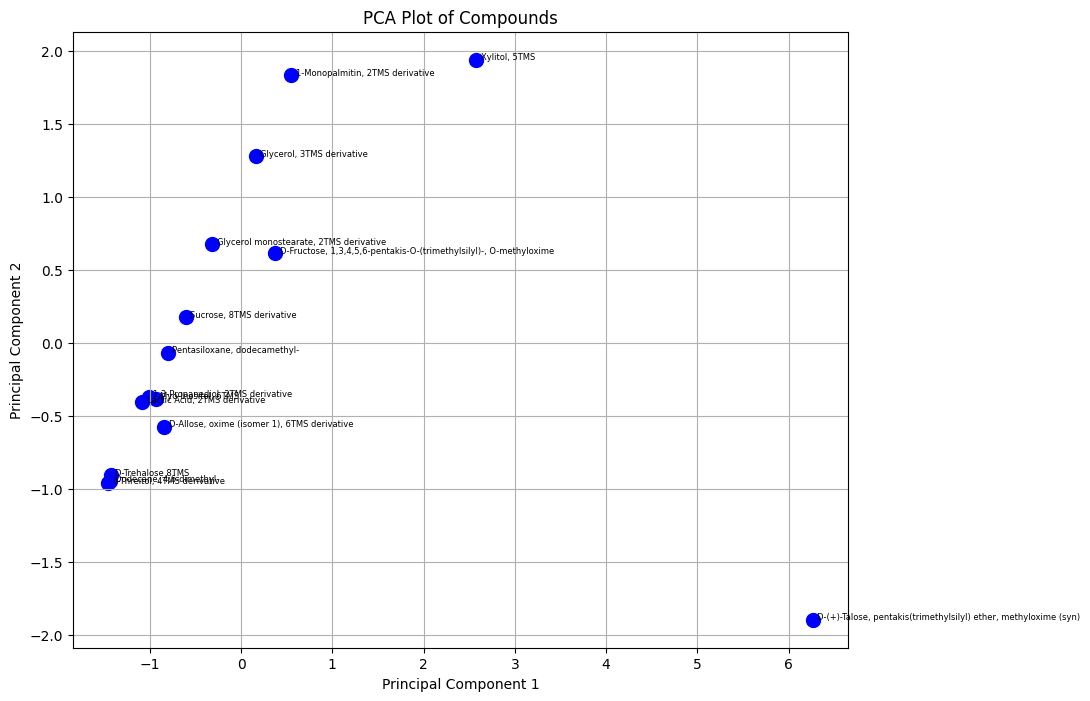

In [79]:
from mbSTATS.plots_compounds.pca_analysis import plot_pca
plot_pca(converted_df, code_to_compound, output)

Plot saved to /home/satvik/mbSTATS/output_plots/correlation_samples.png


sample,oe_oe1_1,oe_oe1_2,oe_oe1_3,wt_wt1_1,wt_wt1_2,wt_wt1_3
sample,,,,,,
oe_oe1_1,1.000000,0.999520,0.400405,-0.165267,0.902331,0.857540
oe_oe1_2,0.999520,1.000000,0.390088,-0.167768,0.909704,0.867324
oe_oe1_3,0.400405,0.390088,1.000000,0.030380,0.062043,-0.034490
wt_wt1_1,-0.165267,-0.167768,0.030380,1.000000,-0.131128,-0.038347
wt_wt1_2,0.902331,0.909704,0.062043,-0.131128,1.000000,0.956985
wt_wt1_3,0.857540,0.867324,-0.034490,-0.038347,0.956985,1.000000


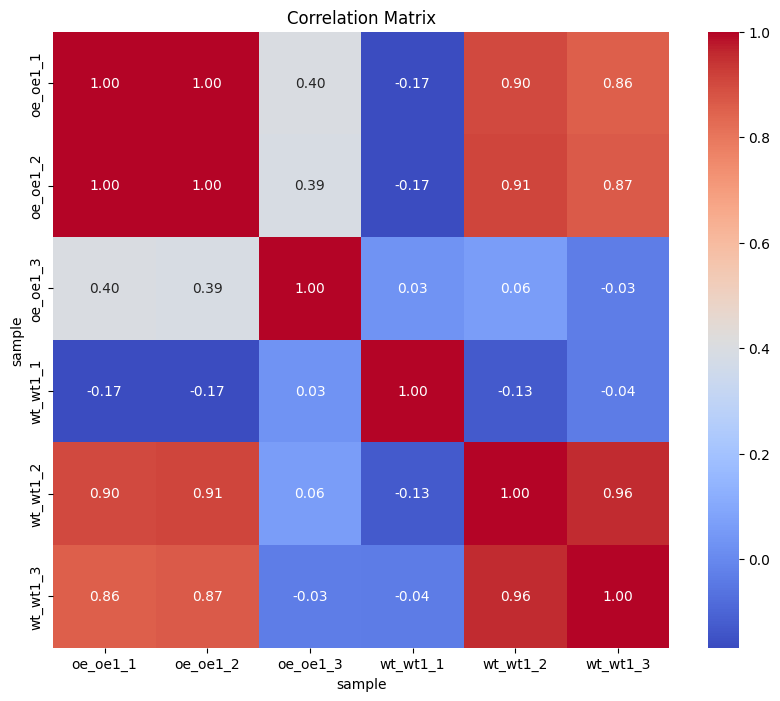

In [90]:
from mbSTATS.plots_compounds.correlation_matrix import plot_correlation_matrix
plot_correlation_matrix(converted_df, output)

Plot saved to /home/satvik/mbSTATS/output_plots/volcano_plot.png


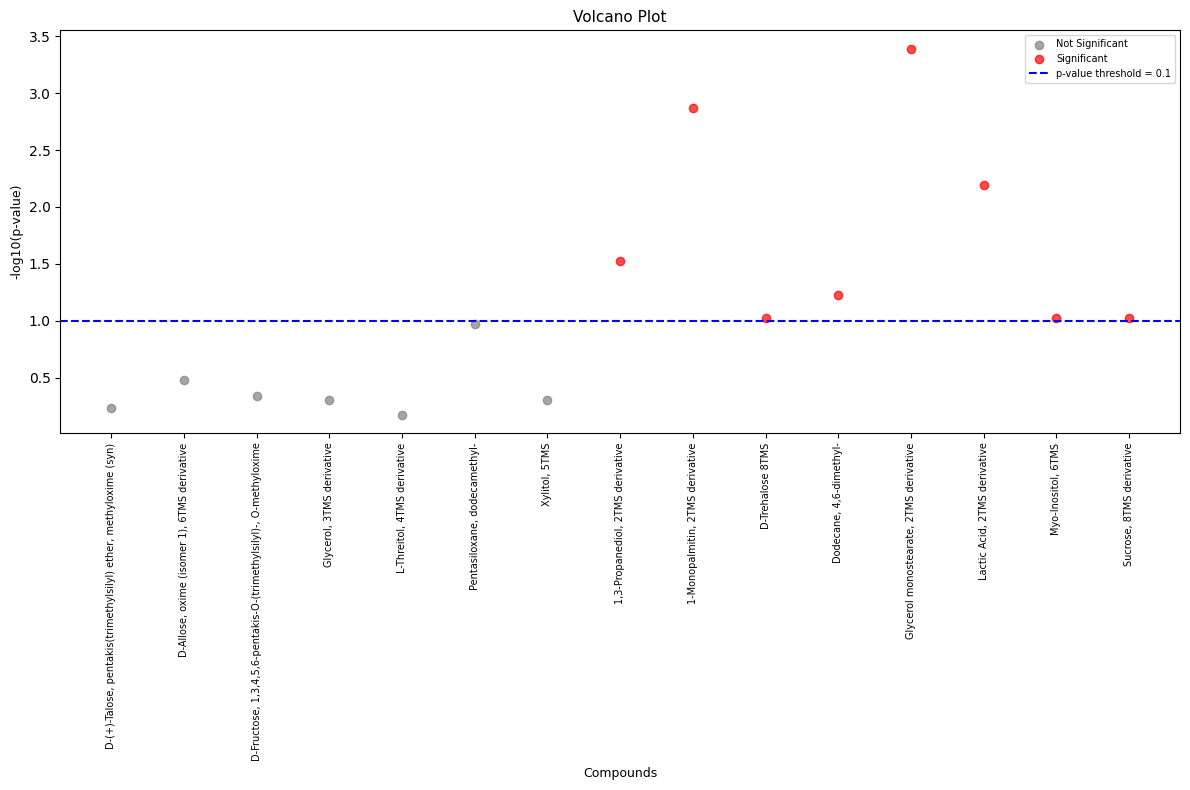

In [99]:
from mbSTATS.plots_compounds.volcano import plot_volcano
plot_volcano(p_values_df, code_to_compound, output)

Plot saved to /home/satvik/mbSTATS/output_plots/pls_da_plot_compounds.png


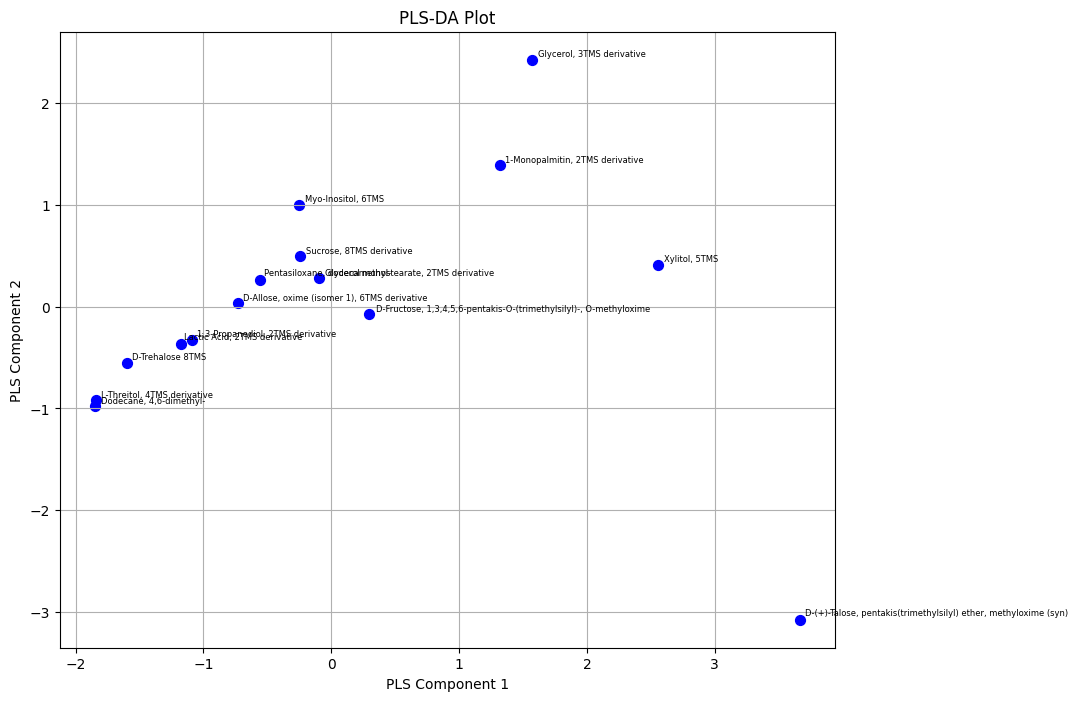

In [103]:
from mbSTATS.plots_compounds.pls_da_comps import perform_pls_da_and_plot
perform_pls_da_and_plot(converted_df, code_to_compound, output)

Plot saved to /home/satvik/mbSTATS/output_plots/pls_da_plot_samples.png


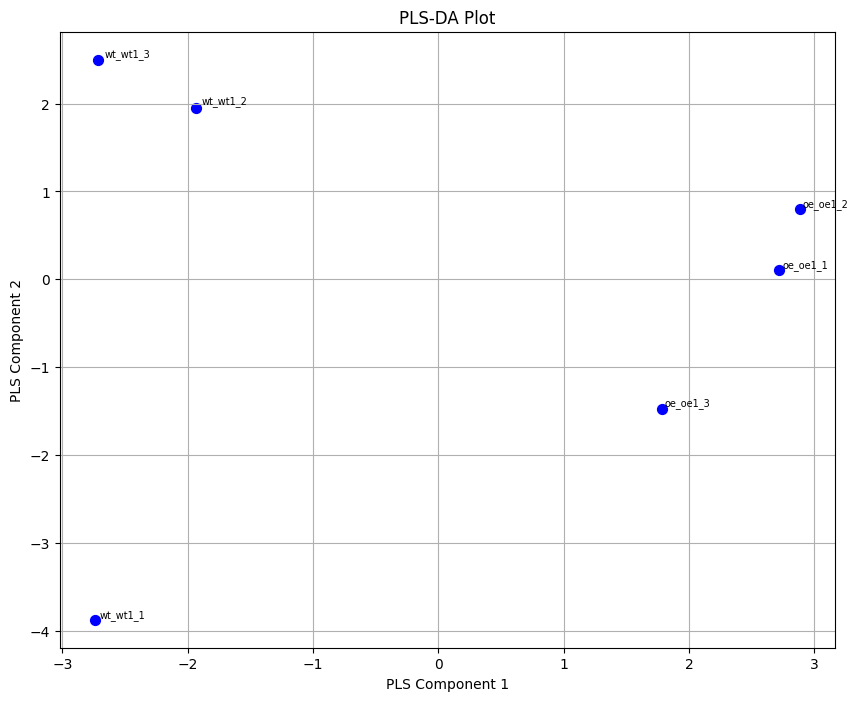

In [107]:
from mbSTATS.plots_samples.pls_da import pls_da_samples
vip_scores, feature_names = pls_da_samples(pqn_normalized_df, output, code_to_compound)

Plot saved to /home/satvik/mbSTATS/output_plots/vip_plot.png


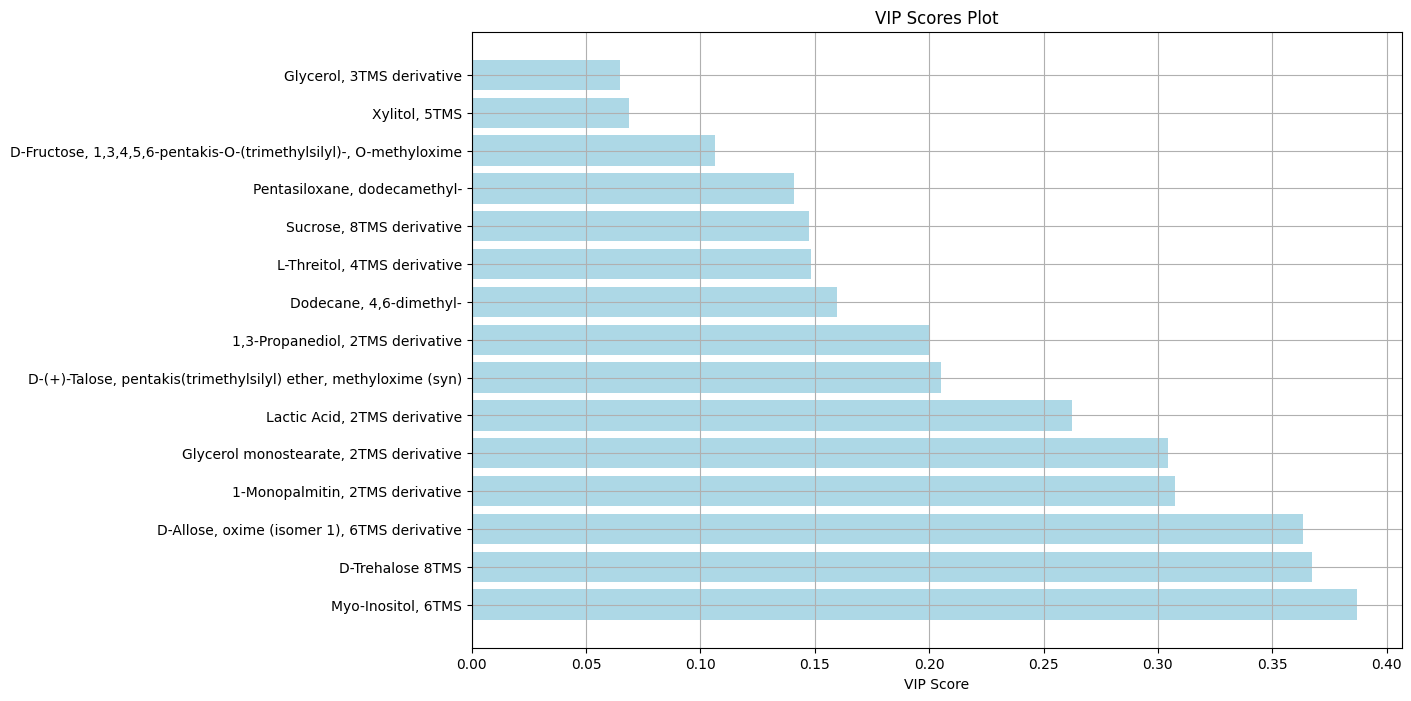

In [109]:
from mbSTATS.plots_samples.plot_vip_score import plot_vip_scores
plot_vip_scores(vip_scores, feature_names, output)

In [114]:
pqn_normalized_df

,sample,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,Group
0,wt_wt1_1,0.920345,1.582166,0.620457,2.016486,0.496366,1.106482,0.361933,0.847958,4.188086,0.475684,0.858299,3.464219,1.664893,1.840690,0.496366,wt
1,wt_wt1_3,2.050937,3.160461,47.507780,9.733547,1.092713,2.050937,0.756493,1.748340,8.792133,0.958225,1.597041,7.968396,3.311760,4.017820,16.306634,wt
2,wt_wt1_2,1.962252,2.943378,48.324918,4.049375,13.075734,2.122800,0.749224,1.605479,8.473361,0.981126,1.534124,7.849008,3.264474,3.781795,18.552202,wt
3,oe_oe1_2,3.518736,12.884526,31.493562,2.555898,9.295765,0.857801,1.260443,7.825249,9.120704,1.032863,3.063576,2.153256,4.516586,5.409400,18.328938,oe1
4,oe_oe1_3,2.782639,10.521422,1.024454,1.979689,7.309619,0.664511,0.886014,6.658952,7.323463,0.802951,2.644199,1.647433,3.488682,4.347008,13.788600,oe1
5,oe_oe1_1,3.324196,13.016850,30.092718,2.484399,9.307748,0.892284,1.067242,7.838103,8.747883,0.839797,3.219221,2.134483,4.426429,5.511166,17.355800,oe1


In [120]:
from mbSTATS.plots_compounds.violin_plot import plot_violin
plot_violin(pqn_normalized_df, code_to_compound, output)

/home/satvik/mbSTATS/mbSTATS/plots_compounds/violin_plot.py:40: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  # Plot formatting
/home/satvik/mbSTATS/mbSTATS/plots_compounds/violin_plot.py:40: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  # Plot formatting


Plot saved to /home/satvik/mbSTATS/output_plots/density_plot_part_1.png


/home/satvik/mbSTATS/mbSTATS/plots_compounds/violin_plot.py:40: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  # Plot formatting
/home/satvik/mbSTATS/mbSTATS/plots_compounds/violin_plot.py:40: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  # Plot formatting


Plot saved to /home/satvik/mbSTATS/output_plots/density_plot_part_2.png


/home/satvik/mbSTATS/mbSTATS/plots_compounds/violin_plot.py:40: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  # Plot formatting
/home/satvik/mbSTATS/mbSTATS/plots_compounds/violin_plot.py:40: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  # Plot formatting


Plot saved to /home/satvik/mbSTATS/output_plots/density_plot_part_3.png


In [123]:
from mbSTATS.plots_compounds.grp_avg import plot_grp_avg
plot_grp_avg(pqn_normalized_df, code_to_compound, output)

Plot saved to /home/satvik/mbSTATS/output_plots/avg_compounds_1.png
Plot saved to /home/satvik/mbSTATS/output_plots/avg_compounds_2.png
Plot saved to /home/satvik/mbSTATS/output_plots/avg_compounds_3.png


In [125]:
from mbSTATS.plots_compounds.comp_density import plot_density
plot_density(pqn_normalized_df, code_to_compound, output)

Plot saved to /home/satvik/mbSTATS/output_plots/density_plot_1.png
Plot saved to /home/satvik/mbSTATS/output_plots/density_plot_2.png
Plot saved to /home/satvik/mbSTATS/output_plots/density_plot_3.png
